# E10 - Visualization Options

Besides showing pysofi-preocessed images directly with <code>matplotlib.pyplot</code>, we also incorporate [Bokeh](https://docs.bokeh.org/en/latest/index.html#) for interactive visualizations. Moreover, after extracting emitters' photo-physical properties with [MOCA](https://github.com/xiyuyi-at-LLNL/pysofi/blob/master/Notebooks/ExampleModule6_MOCA.ipynb), the results can be demonstrated with a transparency map.

In this notebook, we show different Bokeh-based visualization options. Users can choose one or multiple options based on their needs.

## 1. Interactive visualization with <code>Bokeh</code>.

With Bokeh, it is easy to zoom in/out, check pixels values and change field-of-view on images. **pysofi** implements three ways to plot images with Bokeh, 
1. <code>bokeh_visualization</code> for a single greyscale image
2. <code>bokeh_visualization_mult</code> for plotting and comparing multiple greyscale images side-by-side
3. <code>bokeh_visualization_rgba</code> for a single RGBA image 

We recommend the user to choose different methods for different scenarios. For all three functions, we can set the following parameters:

+ <code>image</code>: a greyscale or RGBA image needs to be plotted. A list of images can be passed to <code>bokeh_visualization_mult</code>.
+ <code>palette</code>: choice of palettes. For a complete palette list in bokeh documentation, see [here](https://docs.bokeh.org/en/latest/docs/reference/palettes.html).
+ <code>save_option</code>: whether to save the Bokeh image as a .html file. 
+ <code>imshow_same</code>: whether to plot the image in Bokeh with the same axis direction as <code>matplotlib.pyplot.imshow</code>. The default y axis direction in Bokeh is flipped comparing to imshow. 
+ <code>title_lst</code>: a list of image titles. This is sprecial for <code>bokeh_visualization_mult</code>.

Note that when the image is too large (> 1500 * 1500 pixels), it is likely for users to come across an error using Bokeh. In this case, we recommend to use <code>matplotlib.pyplot.imshow</code> instead.

In [3]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from functions import visualization as v
from functions import pysofi, moca
import tifffile as tiff
%matplotlib inline
%load_ext autoreload
%autoreload 2

# load tiff files
filepath = '../sampledata/simulations'
filename = 'RndomCurves_frame15000_rho04.tif'
d = pysofi.PysofiData(filepath, filename)

# interactively plot one frame
v.bokeh_visualization(d.get_frame(0))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading BokehJS ...

In [10]:
# compare one frame with average image
ave_im = d.average_image(frames=[0,1000])
v.bokeh_visualization_mult([d.get_frame(0), ave_im], ['Frame #1', 'Average image'])

Loading BokehJS ...

# 2. Constrast adjustment

To better visualize images from fluorescence microscopy (especially live-cell results), the user has the option to adjust display contrast using <code>enhance_contrast(im, display_contrast)</code>. The image with enhanced contrast can be plotted with <code>bokeh_visualization_rgba</code> or saved in a .png/.avi file.

In [13]:
en_im = v.enhance_contrast(ave_im, display_contrast = 1.4)
v.bokeh_visualization_rgba(en_im)

Loading BokehJS ...

# 3. Transparency map

After extracting emitters' photo-physical information (e.g., on-time ratio, brightness) using [MOCA](https://github.com/xiyuyi-at-LLNL/pysofi/blob/master/Notebooks/ExampleModule6_MOCA.ipynb), we recommend the user to color-code the features and adjust the intensity information with a transparency map. For instance, on-time ratio profile can be color-coded with 'pink' colormap, and multiplied by the second-order moment reconstruction as the transparency map.

In **pysofi**, <code>add_transmap(im, trans_map, cmap)</code> can come in handy for this purpose. 

In [33]:
ac, rho_map, eps_map = moca.moca(filename, filepath, [0,0,0,0,0,0,0], [0,1000], (301,301), 1000)
rho_cmap = v.add_transmap(rho_map, ac[2], 'cool')

[==============================] 100.0%



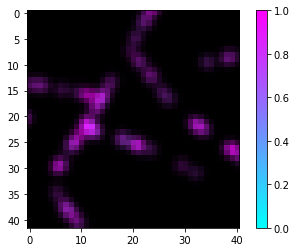

In [34]:
plt.imshow(rho_cmap, cmap='cool')
plt.colorbar()

In [35]:
# Since pixel values of rho_cmap is within range of (0, 1), in order to plot it with Bokeh, 
# we need to convert it to unit8 datatype first.
v.bokeh_visualization_rgba(np.uint8(rho_cmap*255))

Loading BokehJS ...